In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Read all the Excel files of Webshop 1 and 3 over the 7 days into pandas dataframes
file_dates = ['19.04.2021', '20.04.2021', '21.04.2021', '22.04.2021', '23.04.2021', '24.04.2021', '25.04.2021']
dfs = []

for date in file_dates:
    file_path = f'VP_{date}.xlsx'
    df = pd.read_excel(file_path)
    dfs.append(df)

In [3]:
# Step 2: Concatenate the dataframes into a single dataframe
combined_df_webshops = pd.concat(dfs)

In [4]:
# Step 3: Calculate the mean of the product prices from Webshops 1 and 3
average_price_webshops = combined_df_webshops.groupby('Artikel Shop-Nummer')['Verkaufspreis'].mean()

In [5]:
# Optional
print(average_price_webshops)

Artikel Shop-Nummer
33         22.70
119        17.90
120        17.90
121        17.90
122        19.90
           ...  
2747255    38.95
2747256    38.95
2747257    38.95
2747258    38.95
2747259    38.95
Name: Verkaufspreis, Length: 305933, dtype: float64


In [6]:
# Optional: to save the dataframe of the product average price to excel just in case
average_price_webshops.to_csv("average_price_webshops_v1_Q6.csv")

In [7]:
# Step 4: Calcuate the mean of the prices in the competitors
df_competitors = pd.read_csv('Konkurrenzdaten_new.csv')
grouped_data = df_competitors.groupby(['Artikelnummer'])

average_price_competitors = grouped_data['Angebotspreis'].mean()

In [8]:
# Optional: to save the dataframe of the product average price of competitors to excel just in case
print(average_price_competitors)
average_price_competitors.to_csv('average_price_competitors_Q6.csv')

Artikelnummer
33         20.00
119        17.90
120        17.90
121        17.90
122        19.90
           ...  
2747255    48.45
2747256    53.00
2747257    48.45
2747258    48.45
2747259    53.00
Name: Angebotspreis, Length: 308599, dtype: float64


In [9]:
# Step 5: Merge the "average_price_webshops" and "average_price_competitors" into 1 file to compare the average prices
# Step: 5.1 Before the merge, I have to make sure they are compared by "Artikelnummer" and "Angebotspreis", so I need to change the data frame heads of the file "average_price_webshops".

df = pd.read_csv('average_price_webshops_v1_Q6.csv')
df.rename(columns = {'Artikel Shop-Nummer':'Artikelnummer', 'Verkaufspreis':'Angebotspreis'}, inplace = True) 
print(df)
df.to_csv("average_price_webshops_v2_Q6.csv", index = False)

        Artikelnummer  Angebotspreis
0                  33          22.70
1                 119          17.90
2                 120          17.90
3                 121          17.90
4                 122          19.90
...               ...            ...
305928        2747255          38.95
305929        2747256          38.95
305930        2747257          38.95
305931        2747258          38.95
305932        2747259          38.95

[305933 rows x 2 columns]


In [10]:
# Step 5.2: Conduct the file merge
average_price_webshops2 = pd.read_csv('average_price_webshops_v2_Q6.csv')
merge_price_comparison = pd.merge(average_price_competitors, average_price_webshops2, on='Artikelnummer', suffixes=('_competitor', '_own_webshops'))
merge_price_comparison.rename(columns = {'Angebotspreis_own_webshops':'Verkaufspreis_own_webshops'}, inplace = True) # To change the column title
print(merge_price_comparison)

merge_price_comparison.to_csv('price_comparison_Q6.csv', index = False)

        Artikelnummer  Angebotspreis_competitor  Verkaufspreis_own_webshops
0                  33                     20.00                       22.70
1                 119                     17.90                       17.90
2                 120                     17.90                       17.90
3                 121                     17.90                       17.90
4                 122                     19.90                       19.90
...               ...                       ...                         ...
305920        2747255                     48.45                       38.95
305921        2747256                     53.00                       38.95
305922        2747257                     48.45                       38.95
305923        2747258                     48.45                       38.95
305924        2747259                     53.00                       38.95

[305925 rows x 3 columns]


In [11]:
# Step 6: Calculate the mean, median, standard deviation of the price difference
merge_price_comparison['price_difference'] = merge_price_comparison['Angebotspreis_competitor'] - merge_price_comparison['Verkaufspreis_own_webshops']

mean_difference = merge_price_comparison['price_difference'].mean()
median_difference = merge_price_comparison['price_difference'].median()
std_dev_difference = merge_price_comparison['price_difference'].std()

print("Mean Price Difference:", mean_difference)
print("Median Price Difference:", median_difference)
print("Standard Deviation of Price Difference:", std_dev_difference)

Mean Price Difference: -6.656458633303504
Median Price Difference: 0.0
Standard Deviation of Price Difference: 113.52940631954208


In [12]:
# Step 7: Calculate price difference percentage between own webshops and the competitors
merge_price_comparison['price_difference_percentage'] = ((merge_price_comparison['Angebotspreis_competitor'] - merge_price_comparison['Verkaufspreis_own_webshops']) / merge_price_comparison['Verkaufspreis_own_webshops']) * 100

print(merge_price_comparison)

        Artikelnummer  Angebotspreis_competitor  Verkaufspreis_own_webshops  \
0                  33                     20.00                       22.70   
1                 119                     17.90                       17.90   
2                 120                     17.90                       17.90   
3                 121                     17.90                       17.90   
4                 122                     19.90                       19.90   
...               ...                       ...                         ...   
305920        2747255                     48.45                       38.95   
305921        2747256                     53.00                       38.95   
305922        2747257                     48.45                       38.95   
305923        2747258                     48.45                       38.95   
305924        2747259                     53.00                       38.95   

        price_difference  price_difference_percenta

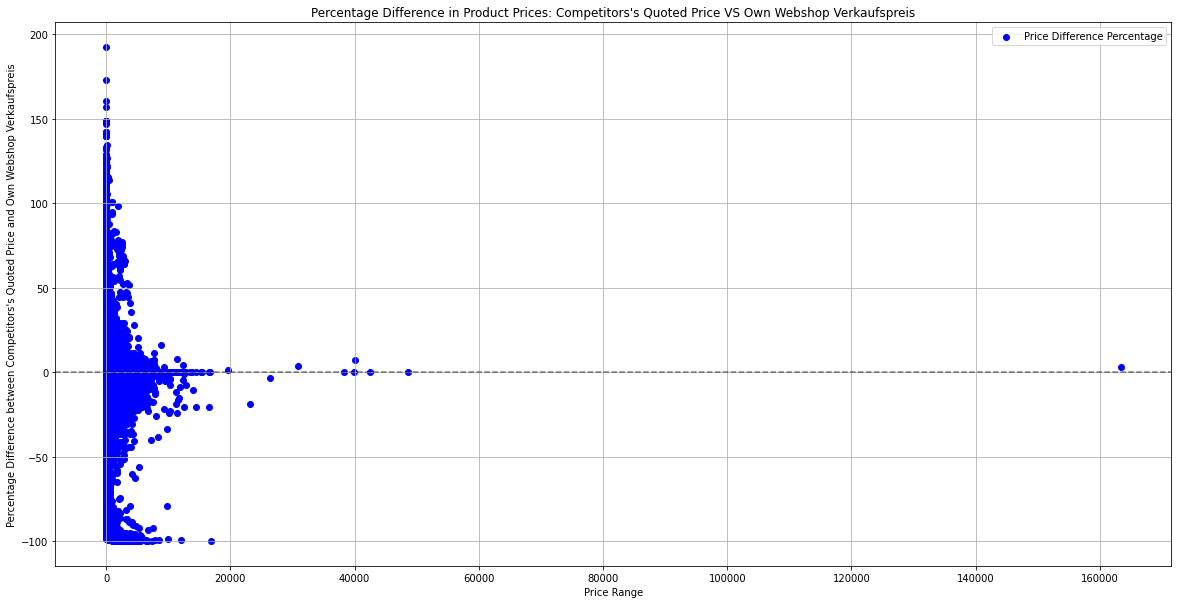

In [13]:
# Step 8: Create a scatter plot according to the price differences percentage

plt.figure(figsize=(20, 10))
plt.scatter(merge_price_comparison['Verkaufspreis_own_webshops'], merge_price_comparison['price_difference_percentage'], color='blue', label='Price Difference Percentage')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Price Range')
plt.ylabel("Percentage Difference between Competitors's Quoted Price and Own Webshop Verkaufspreis")
plt.title("Percentage Difference in Product Prices: Competitors's Quoted Price VS Own Webshop Verkaufspreis")
plt.legend()
plt.grid(True)
plt.show()

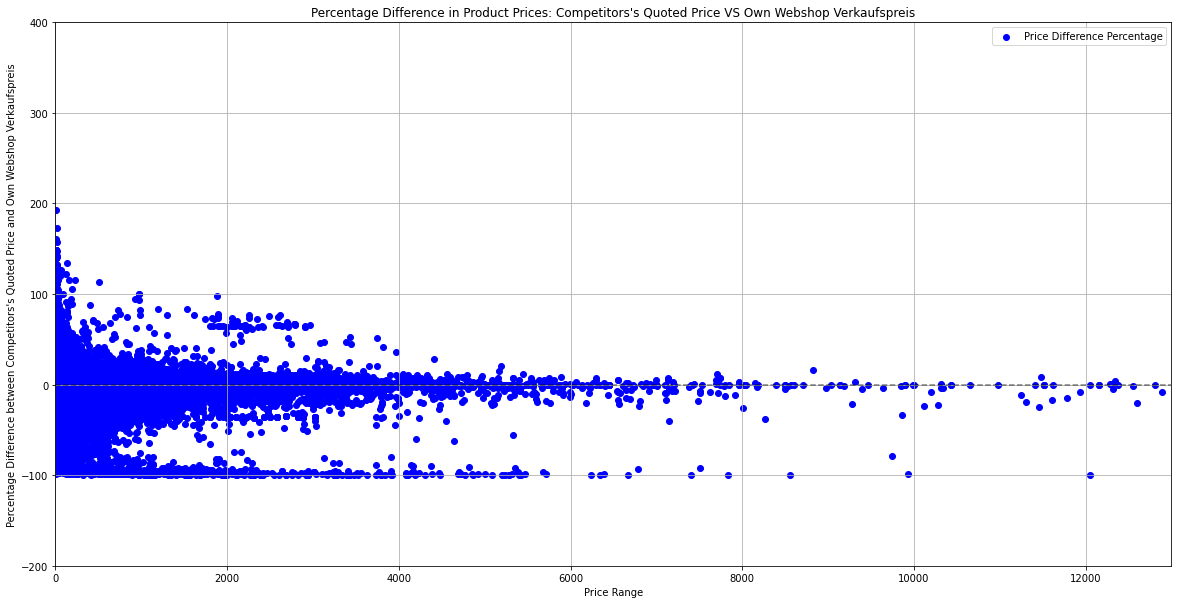

In [14]:
# Optional: Step 9: Zoom in a specific price range (0-13'000 CHF) in order to see details:

plt.figure(figsize=(20, 10))
plt.scatter(merge_price_comparison['Verkaufspreis_own_webshops'], merge_price_comparison['price_difference_percentage'], color='blue', label='Price Difference Percentage')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Price Range')
plt.ylabel("Percentage Difference between Competitors's Quoted Price and Own Webshop Verkaufspreis")
plt.title("Percentage Difference in Product Prices: Competitors's Quoted Price VS Own Webshop Verkaufspreis")
plt.axis([0, 13000, -200, 400]) # where x_min, x_max, y_min, and y_max are the coordinate limits for both axes
plt.legend()
plt.grid(True)
plt.show()